In [1]:
import pickle
import torch

with open(f'./data/openai_gpt_final_results.pkl', 'rb') as infile:
    results_gpt = pickle.load(infile)

with open(f'./data/openai_deberta_final_results.pkl', 'rb') as infile:
    results_deberta = pickle.load(infile)

print(len(results_gpt['ids']))

1824


In [2]:
import numpy as np
import pandas as pd

questions = pd.read_csv('~/RCOG_Uncertainty_Dataset_Unanswered.csv')
print(questions.Source.unique())
part1 = ['part 1' in x.lower() for x in questions.Source]
part2 = ['part 2' in x.lower() for x in questions.Source]
sba = ['sba' in x.lower() for x in questions['Question Type']]
emq = ['emq' in x.lower() for x in questions['Question Type']]

assert len(results_gpt['ids']) == len(results_deberta['ids']) == len(part1)
print(f'''
{np.sum(part1)}
{np.sum(part2)}
{np.sum(sba)}
{np.sum(emq)}
      ''')


['SBAs for the Part 1 MRCOG' 'RCOG'
 'Part 1 MRCOG Revision Notes and Sample SBAs' 'SBAs for the Part 2 MRCOG'
 'Cambridge SBA Questions for the Part 2 MRCOG'
 'Part 2 MRCOG: 500 EMQs and SBAs' 'EMQs for the MRCOG Part 2']

411
849
1424
400
      


In [11]:
# subset results
dlld = lambda DL: [dict(zip(DL,t)) for t in zip(*DL.values())]
lddl = lambda LD: {k: [dic[k] for dic in LD] for k in LD[0]}
# deberta subsets
deberta_part1 = lddl([res for inc, res in zip(part1, dlld(results_deberta)) if inc])
deberta_part2 = lddl([res for inc, res in zip(part2, dlld(results_deberta)) if inc])
deberta_sba = lddl([res for inc, res in zip(sba, dlld(results_deberta)) if inc])
deberta_emq = lddl([res for inc, res in zip(emq, dlld(results_deberta)) if inc])

# gpt subsets
gpt_part1 = lddl([res for inc, res in zip(part1, dlld(results_gpt)) if inc])
gpt_part2 = lddl([res for inc, res in zip(part2, dlld(results_gpt)) if inc])
gpt_sba = lddl([res for inc, res in zip(sba, dlld(results_gpt)) if inc])
gpt_emq = lddl([res for inc, res in zip(emq, dlld(results_gpt)) if inc])

Metric      Accuracy
--------  ----------
SE          0.408443
SDE         0.400219
OSE         0.430373
Perp        0.411184
Metric      Accuracy
--------  ----------
SE          0.464912
SDE         0.456689
OSE         0.480263
Perp        0.480263


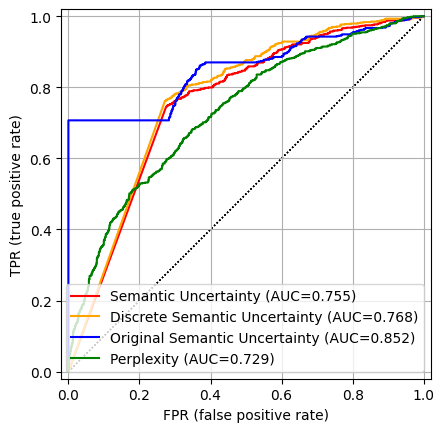

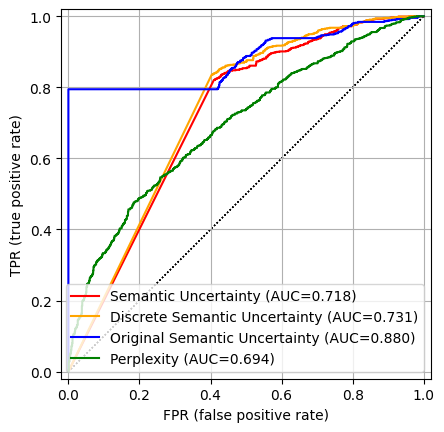

In [18]:
from roc import rocs_from_results, table_from_results

table_from_results(results_deberta)
rocs_from_results(results_deberta)
table_from_results(results_gpt)
rocs_from_results(results_gpt)

Metric      Accuracy
--------  ----------
SE          0.450122
SDE         0.447689
OSE         0.46472
Perp        0.459854
Metric      Accuracy
--------  ----------
SE          0.325088
SDE         0.31331
OSE         0.354535
Perp        0.322733


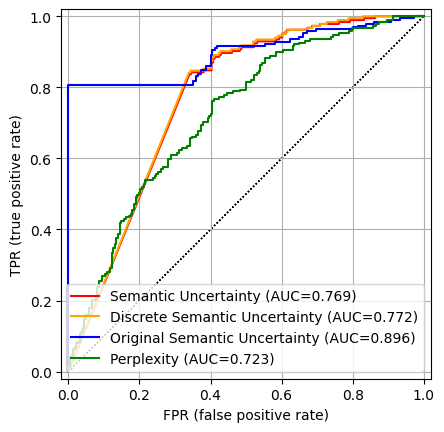

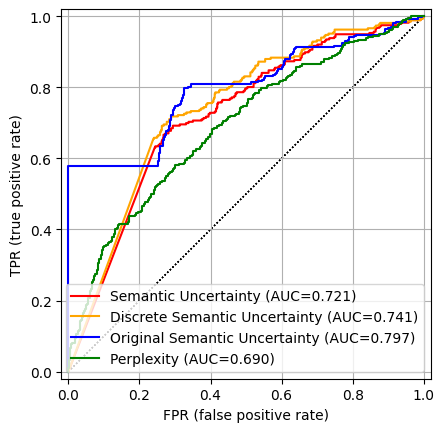

In [17]:

table_from_results(deberta_part1)
rocs_from_results(deberta_part1)
table_from_results(deberta_part2)
rocs_from_results(deberta_part2)


Metric      Accuracy
--------  ----------
SE          0.438904
SDE         0.430478
OSE         0.460674
Perp        0.445225
Metric      Accuracy
--------  ----------
SE            0.3
SDE           0.2925
OSE           0.3225
Perp          0.29


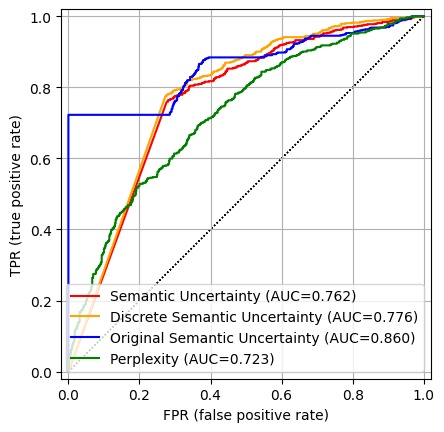

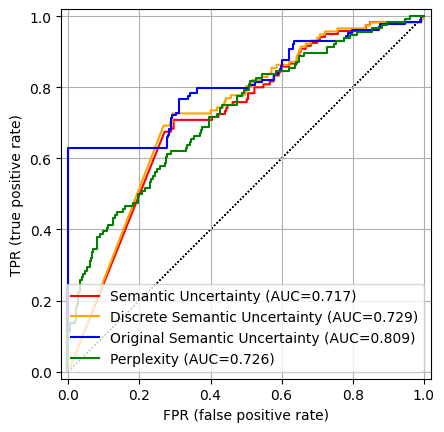

In [14]:
table_from_results(deberta_sba)
table_from_results(deberta_emq)
rocs_from_results(deberta_sba)
rocs_from_results(deberta_emq)

Metric      Accuracy
--------  ----------
SE          0.515815
SDE         0.498783
OSE         0.513382
Perp        0.510949
Metric      Accuracy
--------  ----------
SE          0.375736
SDE         0.368669
OSE         0.400471
Perp        0.393404


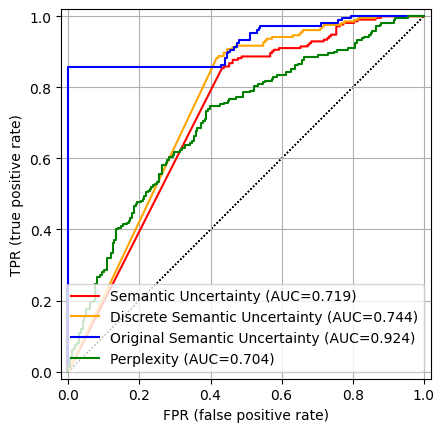

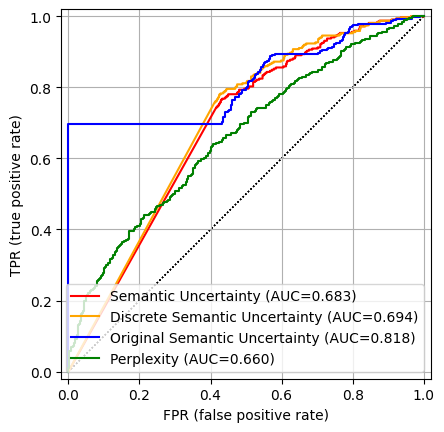

In [15]:
table_from_results(gpt_part1)
table_from_results(gpt_part2)
rocs_from_results(gpt_part1)
rocs_from_results(gpt_part2)

Metric      Accuracy
--------  ----------
SE          0.496489
SDE         0.488764
OSE         0.509831
Perp        0.510534
Metric      Accuracy
--------  ----------
SE            0.3525
SDE           0.3425
OSE           0.375
Perp          0.3725


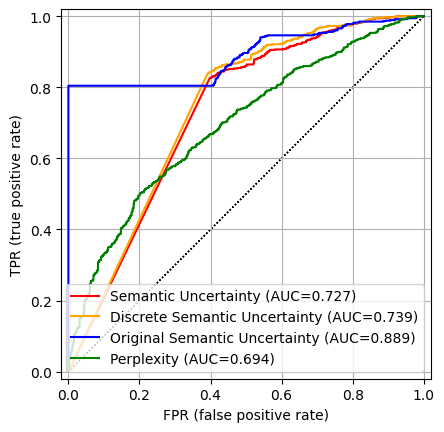

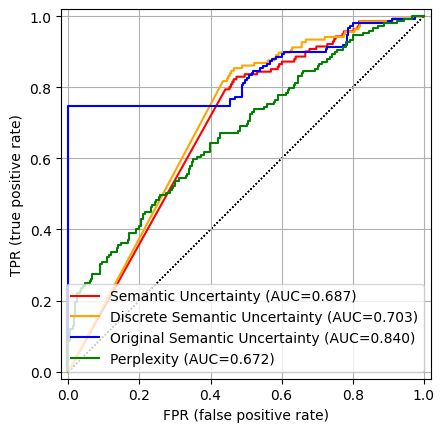

In [16]:
table_from_results(gpt_sba)
table_from_results(gpt_emq)
rocs_from_results(gpt_sba)
rocs_from_results(gpt_emq)